In [15]:
!pip install librosa

Training started
(3400, 40, 1) (1676, 40, 1)
<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000019BF58AFC70>>
Epoch 1/50
213/213 [==============================] - 1s 6ms/step - loss: 4.6696 - accuracy: 0.4291 - val_loss: 2.1117 - val_accuracy: 0.5442
Epoch 2/50
213/213 [==============================] - 1s 3ms/step - loss: 1.8826 - accuracy: 0.5979 - val_loss: 1.4671 - val_accuracy: 0.5895
Epoch 3/50
213/213 [==============================] - 1s 3ms/step - loss: 1.0464 - accuracy: 0.6759 - val_loss: 0.8887 - val_accuracy: 0.7076
Epoch 4/50
213/213 [==============================] - 1s 3ms/step - loss: 0.7865 - accuracy: 0.7218 - val_loss: 0.8441 - val_accuracy: 0.7166
Epoch 5/50
213/213 [==============================] - 1s 3ms/step - loss: 0.7095 - accuracy: 0.7476 - val_loss: 0.7710 - val_accuracy: 0.7255
Epoch 6/50
213/213 [==============================] - 1s 3ms/step - loss: 0.6792 - accuracy: 0.7635 - val_loss: 0.6830 - val_accu

Epoch 1/100
54/54 [==============================] - 0s 8ms/step - loss: 0.3445 - accuracy: 0.8785 - val_loss: 0.6772 - val_accuracy: 0.8013
Epoch 2/100
54/54 [==============================] - 0s 7ms/step - loss: 0.3324 - accuracy: 0.8791 - val_loss: 0.6517 - val_accuracy: 0.7918
Epoch 3/100
54/54 [==============================] - 0s 8ms/step - loss: 0.3359 - accuracy: 0.8782 - val_loss: 0.7076 - val_accuracy: 0.7959
Epoch 4/100
54/54 [==============================] - 0s 8ms/step - loss: 0.3360 - accuracy: 0.8818 - val_loss: 0.6330 - val_accuracy: 0.8019
Epoch 5/100
54/54 [==============================] - 0s 8ms/step - loss: 0.3001 - accuracy: 0.8947 - val_loss: 0.5864 - val_accuracy: 0.8144
Epoch 6/100
54/54 [==============================] - 0s 7ms/step - loss: 0.2810 - accuracy: 0.8965 - val_loss: 0.5820 - val_accuracy: 0.8168
Epoch 7/100
54/54 [==============================] - 0s 7ms/step - loss: 0.2949 - accuracy: 0.8953 - val_loss: 0.5924 - val_accuracy: 0.8126
Epoch 8/100
5

Epoch 59/100
54/54 [==============================] - 0s 7ms/step - loss: 0.2501 - accuracy: 0.9109 - val_loss: 0.5712 - val_accuracy: 0.8258
Epoch 60/100
54/54 [==============================] - 0s 7ms/step - loss: 0.2537 - accuracy: 0.9103 - val_loss: 0.5712 - val_accuracy: 0.8258
Epoch 61/100
54/54 [==============================] - 0s 7ms/step - loss: 0.2435 - accuracy: 0.9124 - val_loss: 0.5712 - val_accuracy: 0.8258
Epoch 62/100
54/54 [==============================] - 0s 8ms/step - loss: 0.2469 - accuracy: 0.9121 - val_loss: 0.5712 - val_accuracy: 0.8258
Epoch 63/100
54/54 [==============================] - 0s 8ms/step - loss: 0.2535 - accuracy: 0.9065 - val_loss: 0.5712 - val_accuracy: 0.8258
Epoch 64/100
54/54 [==============================] - 0s 8ms/step - loss: 0.2586 - accuracy: 0.9041 - val_loss: 0.5712 - val_accuracy: 0.8258
Epoch 65/100
54/54 [==============================] - 0s 8ms/step - loss: 0.2460 - accuracy: 0.9135 - val_loss: 0.5712 - val_accuracy: 0.8258
Epoch 

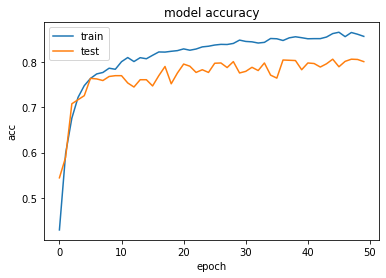

In [17]:
'''import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
import pandas as pd
import numpy as np'''

import os
import sys
import librosa
import librosa.display
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import Audio
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


class TrainModel:

    @staticmethod
    def train_neural_network(X, y) -> None:
        """
        This function trains the neural network.
        """

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        x_traincnn = np.expand_dims(X_train, axis=2)
        x_testcnn = np.expand_dims(X_test, axis=2)

        print(x_traincnn.shape, x_testcnn.shape)

        model = Sequential()
        model.add(Conv1D(64, 5, padding='same',
                         input_shape=(40, 1)))
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(8))
        model.add(Activation('softmax'))

        print(model.summary)

        model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

        cnn_history = model.fit(x_traincnn, y_train,
                               batch_size=16, epochs=50,
                               validation_data=(x_testcnn, y_test))

        # Loss plotting
        plt.plot(cnn_history.history['loss'])
        plt.plot(cnn_history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.savefig('loss.png')
        plt.close()

        # Accuracy plotting
        plt.plot(cnn_history.history['accuracy'])
        plt.plot(cnn_history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('acc')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.savefig('accuracy.png')

        predictions = model.predict_classes(x_testcnn)
        new_y_test = y_test.astype(int)
        matrix = confusion_matrix(new_y_test, predictions)

        print(classification_report(new_y_test, predictions))
        print(matrix)

        model_name = 'Emotion_Voice_Detection_Model.h5'

        # Save model and weights
        if not os.path.isdir("C:\\model"):
            os.makedirs("C:\\model")
        model_path = os.path.join("C:\\model", model_name)
        model.save(model_path)
        print('Saved trained model at %s ' % model_path)
        
if __name__ == '__main__':
    print('Training started')
    X = joblib.load("C:\\joblib_features\\X.joblib")
    y = joblib.load("C:\\joblib_features\\y.joblib")
    NEURAL_NET = TrainModel.train_neural_network(X=X, y=y)